<a href="https://colab.research.google.com/github/matiasfeliu92/barrios_populares/blob/master/barrios_populares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://datos.gob.ar/dataset/desarrollo-social-registro-nacional-barrios-populares

In [ ]:
ruta_archivo_drive = '/content/drive/MyDrive/archivos_csv/20231205_info_publica_datos_barrios.csv'
barrios_populares = pd.read_csv(ruta_archivo_drive)

In [ ]:
for col in barrios_populares.columns:
  if 'id_renabap' in col:
    barrios_populares.drop(col, axis=1, inplace=True)

In [ ]:
barrios_populares.head()

,nombre_barrio,provincia,departamento,localidad,cantidad_viviendas_aproximadas,cantidad_familias_aproximada,decada_de_creacion,anio_de_creacion,energia_electrica,efluentes_cloacales,agua_corriente,cocina,calefaccion,titulo_propiedad,clasificacion_barrio,superficie_m2
0,Monterrey I,Buenos Aires,Pilar,Presidente Derqui,40,44,Década 1990,NaN,Conexión regular a la red con medidor prepago,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo domiciliaria,Gas en garrafa,Sin Datos,NO,Asentamiento,11674
1,Malvinas II,Buenos Aires,La Plata,José Melchor Romero,290,319,Década 1990,NaN,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Conexión irregular a la red de agua,Gas en garrafa,Leña o carbón,NO,Asentamiento,98093
2,Ferroviario,Buenos Aires,La Plata,Angel Etcheverry,133,146,Década 2000,NaN,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión formal a la red de agua con factura,Gas en garrafa,Leña o carbón,NO,Asentamiento,75887
3,La Favelita,Buenos Aires,La Plata,Tolosa,122,134,Década 1970,NaN,Conexión irregular a la red,Desagüe sólo a pozo negro/ciego u hoyo,Conexión irregular a la red de agua,Gas en garrafa,Energía eléctrica,NO,Asentamiento,36889
4,Casaca,Buenos Aires,La Plata,City Bell,20,22,Década 2000,NaN,Conexión irregular a la red,Desagüe a cámara séptica y pozo ciego,Bomba de agua de pozo domiciliaria,Gas en garrafa,Sin Datos,NO,Asentamiento,25768


In [ ]:
print(f"This dataset has {barrios_populares.shape[0]} rows and {barrios_populares.shape[1]} columns")

This dataset has 6467 rows and 16 columns


In [ ]:
barrios_populares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6467 entries, 0 to 6466
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nombre_barrio                   6467 non-null   object 
 1   provincia                       6467 non-null   object 
 2   departamento                    6467 non-null   object 
 3   localidad                       6467 non-null   object 
 4   cantidad_viviendas_aproximadas  6467 non-null   int64  
 5   cantidad_familias_aproximada    6467 non-null   int64  
 6   decada_de_creacion              6467 non-null   object 
 7   anio_de_creacion                1688 non-null   float64
 8   energia_electrica               6467 non-null   object 
 9   efluentes_cloacales             6467 non-null   object 
 10  agua_corriente                  6467 non-null   object 
 11  cocina                          6467 non-null   object 
 12  calefaccion                     64

**nombre_barrio**: El nombre del barrio.

**provincia**: La provincia en la que se encuentra el barrio.

**departamento**: El departamento (división administrativa) donde se ubica el barrio.

**localidad**: La localidad específica dentro del departamento.

**cantidad_viviendas_aproximadas**: El número aproximado de viviendas en el barrio.

**cantidad_familias_aproximada**: El número aproximado de familias que residen en el barrio.

**decada_de_creacion**: La década en la que se creó el barrio.

**anio_de_creacion**: El año específico de creación del barrio. Esta columna contiene muchos valores nulos.

**energia_electrica**: Indica si el barrio tiene acceso a energía eléctrica.

**efluentes_cloacales**: Indica si el barrio tiene acceso a un sistema de efluentes cloacales (alcantarillado).

**agua_corriente**: Indica si el barrio tiene acceso a agua corriente.

**cocina**: Indica el tipo de cocina disponible en las viviendas del barrio.

**calefaccion**: Indica el tipo de calefacción disponible en las viviendas del barrio.

**titulo_propiedad**: Indica el estado del título de propiedad de las viviendas en el barrio.

**clasificacion_barrio**: Clasificación del barrio, que puede referirse a características socioeconómicas o administrativas.

**superficie_m2**: La superficie total del barrio en metros cuadrados.

# Analisis descriptivo

### ¿Cual es la provincia que posee mas barrios populares?

<ipython-input-97-f295ae4ec8d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=barrios_populares,


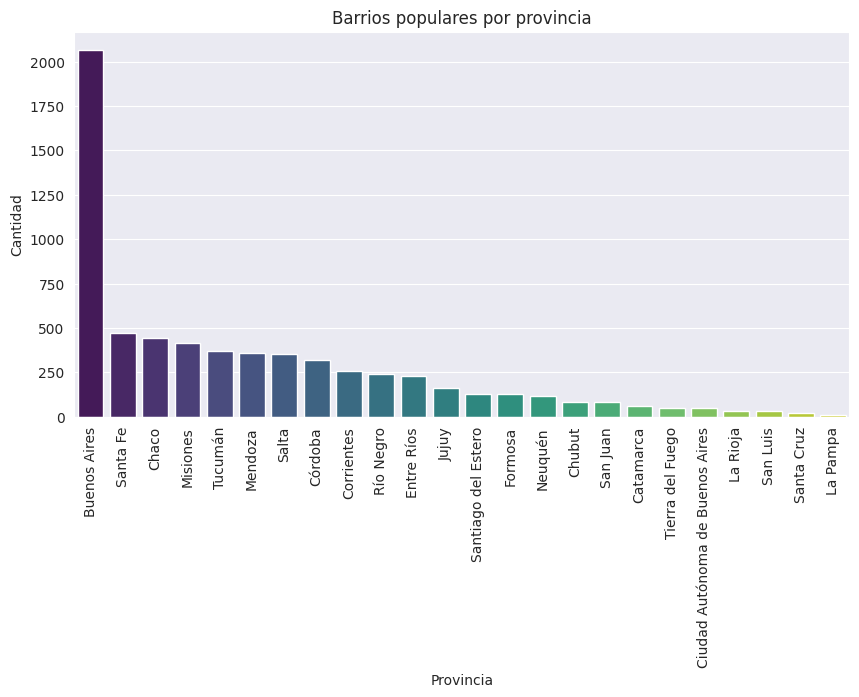

In [ ]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
ax = sns.countplot(data=barrios_populares,
              order=barrios_populares['provincia'].value_counts().index,
              palette="viridis",
              x='provincia')
plt.title('Barrios populares por provincia')
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

podemos observar claramente en el grafico, que Buenos Aires es la provincia que posee mas barrios populares, es decir con mas situaciones criticas de habitat, en relacion al resto del pais.

### ¿Como es la relacion entre la cantidad de viviendas y la cantidad de familias?

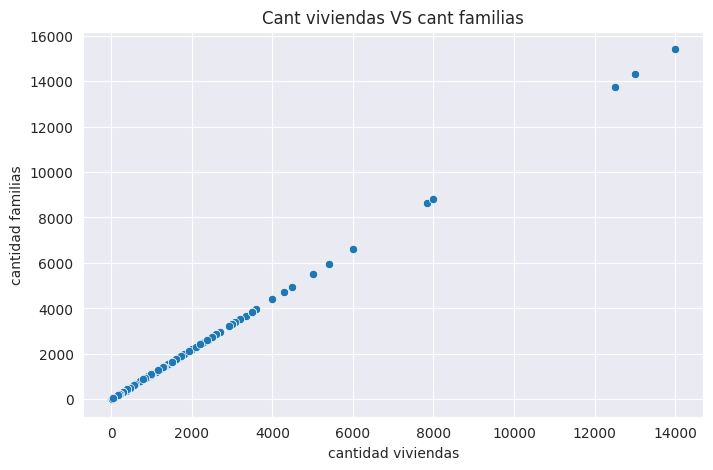

In [ ]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.scatterplot(data=barrios_populares, x='cantidad_viviendas_aproximadas', y='cantidad_familias_aproximada')
plt.title('Cant viviendas VS cant familias')
plt.xlabel('cantidad viviendas')
plt.ylabel('cantidad familias')
plt.show()

podemos observar claramente que la cantidad de viviendas esta fuertemente relacionada con la cantidad de familias, es decir a mayor cantidad de familias, mayor cantidad de viviendas

In [ ]:
print({'anio_de_creacion': barrios_populares.anio_de_creacion.unique()})
print({'anio_de_creacion': barrios_populares.decada_de_creacion.unique()})
print({'energia_electrica': barrios_populares.energia_electrica.unique()})
print({'efluentes_cloacales': barrios_populares.efluentes_cloacales.unique()})
print({'agua_corriente': barrios_populares.agua_corriente.unique()})
print({'cocina': barrios_populares.cocina.unique()})
print({'calefaccion': barrios_populares.calefaccion.unique()})

print({'clasificacion_barrio': barrios_populares.clasificacion_barrio.unique()})
print({'titulo_propiedad': barrios_populares.titulo_propiedad.unique()})

{'anio_de_creacion': array([  nan, 2014., 2011., 2013., 2012., 2010., 2015., 2016., 2017.,
       2018., 2020., 2019., 2021.])}
{'anio_de_creacion': array(['Década 1990', 'Década 2000', 'Década 1970', 'Década 1980',
       'Década 1960', 'Década 1950', 'Década 2010', 'Década 1940',
       'Década 1930', 'Década 1920', 'Década 1910', 'Década 1900',
       'Década 2020'], dtype=object)}
{'energia_electrica': array(['Conexión regular a la red con medidor prepago',
       'Conexión irregular a la red',
       'Conexión formal a la red con medidor domiciliario con factura',
       'Conexión a la red con medidor comunitario',
       'Conexión regular a la red con medidor domiciliario con consumo limitado',
       'No tiene conexión eléctrica', 'Energía solar',
       'Generador eléctrico a combustión',
       'Conexión a la red con medidor compartido',
       'Conexión regular a la red con medidor domiciliario pero sin factura'],
      dtype=object)}
{'efluentes_cloacales': array(['Desagüe a

### ¿Como es la relacion entre el tipo de barrio segun la clasificacion y la cantidad de viviendas/familias?

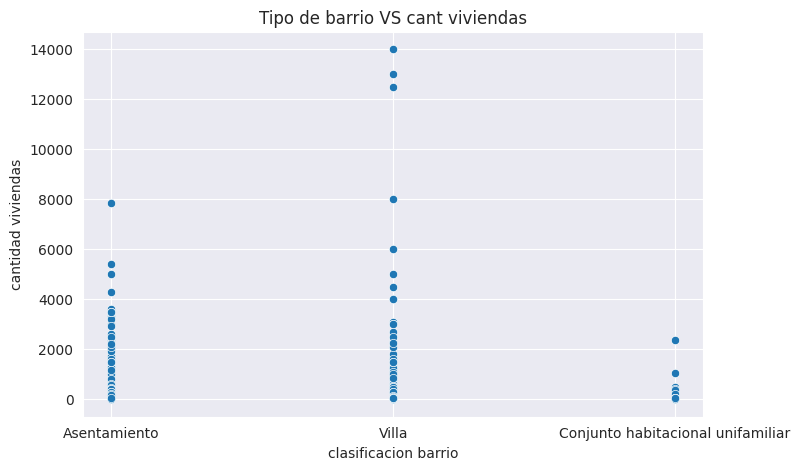

In [ ]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.scatterplot(data=barrios_populares, x='clasificacion_barrio', y='cantidad_viviendas_aproximadas')
plt.title('Tipo de barrio VS cant viviendas')
plt.xlabel('clasificacion barrio')
plt.ylabel('cantidad viviendas')
plt.show()

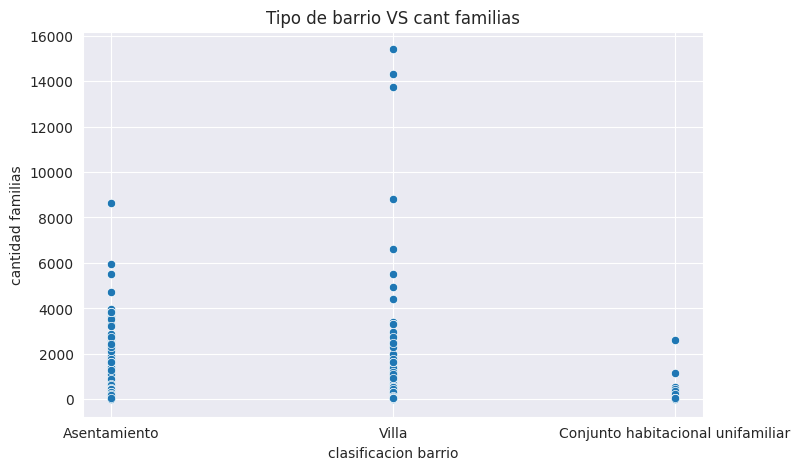

In [ ]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.scatterplot(data=barrios_populares, x='clasificacion_barrio', y='cantidad_familias_aproximada')
plt.title('Tipo de barrio VS cant familias')
plt.xlabel('clasificacion barrio')
plt.ylabel('cantidad familias')
plt.show()

En ambos graficos, podemos observar, que las villas poseen mas viviendas y por consiguiente mas concentracion de familias, en relacion a los asentamientos y a los conjuntos habitacionales